# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 1.0.2
- matplotlib 3.5.2
- umap-learn 0.5.3

In [1]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data[:400]
y = digits.target[:400]
(n_samples, n_features), n_digits = X.shape, np.unique(y).size

In [6]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans_1 = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans_2 = KMeans(init="random", n_clusters=n_digits, n_init=4)
pca = PCA(n_components=10).fit(X)
kmeans_3 = KMeans(init=pca.components_, n_clusters=n_digits, n_init=4)

- n_init: Number of times the k-means algorithm is run with different centroid seeds.

In [21]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

estimator_1 = make_pipeline(MinMaxScaler(), kmeans_1).fit(X)
estimator_2 = make_pipeline(MinMaxScaler(), kmeans_2).fit(X)
estimator_3 = make_pipeline(MinMaxScaler(), kmeans_3).fit(X)


In [22]:
print(silhouette_score(X, estimator_1[-1].labels_, metric="euclidean",))
print(silhouette_score(X, estimator_2[-1].labels_, metric="euclidean",))
print(silhouette_score(X, estimator_3[-1].labels_, metric="euclidean",))

0.23440283455304325
0.20545608809768467
0.2067210265638138


- The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b)
- The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.

For n_clusters = 8 The average silhouette_score is : 0.2067210265638138
For n_clusters = 9 The average silhouette_score is : 0.20637068052098434
For n_clusters = 10 The average silhouette_score is : 0.22706105639991064
For n_clusters = 11 The average silhouette_score is : 0.19645433179990884
For n_clusters = 12 The average silhouette_score is : 0.18064338867576007


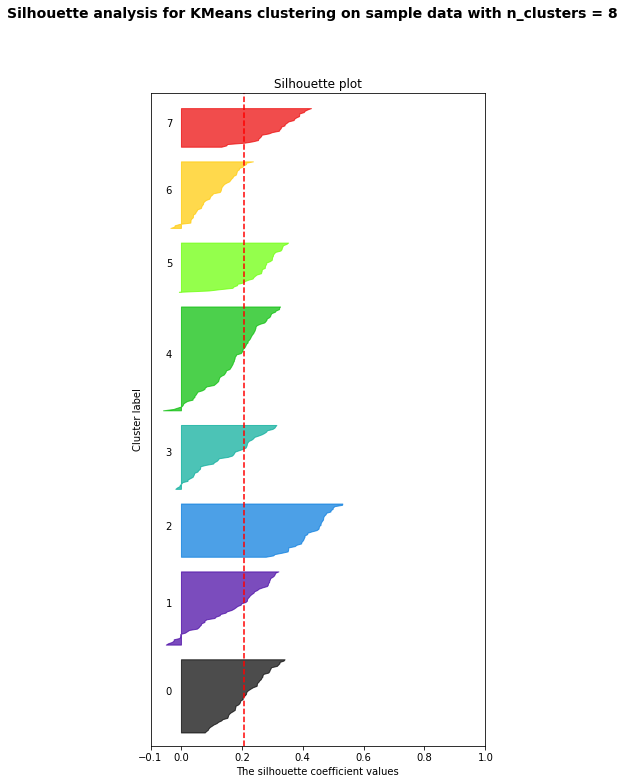

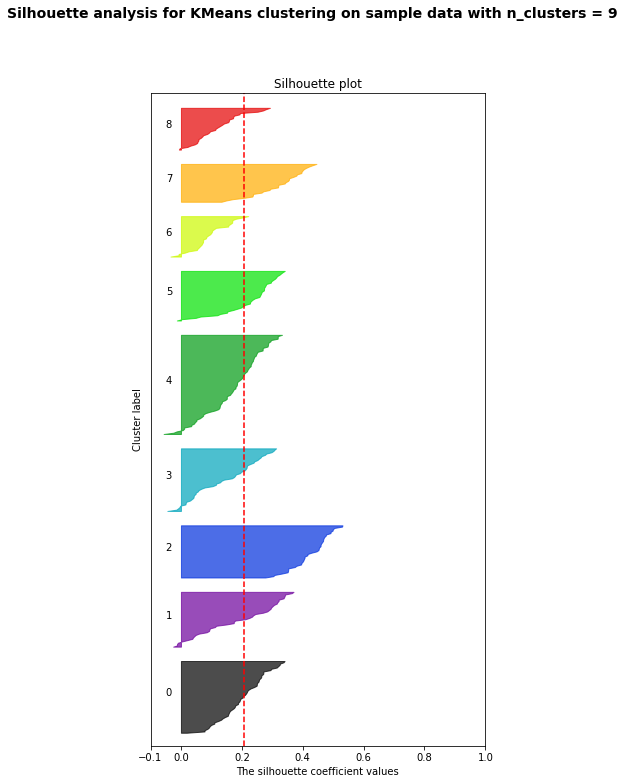

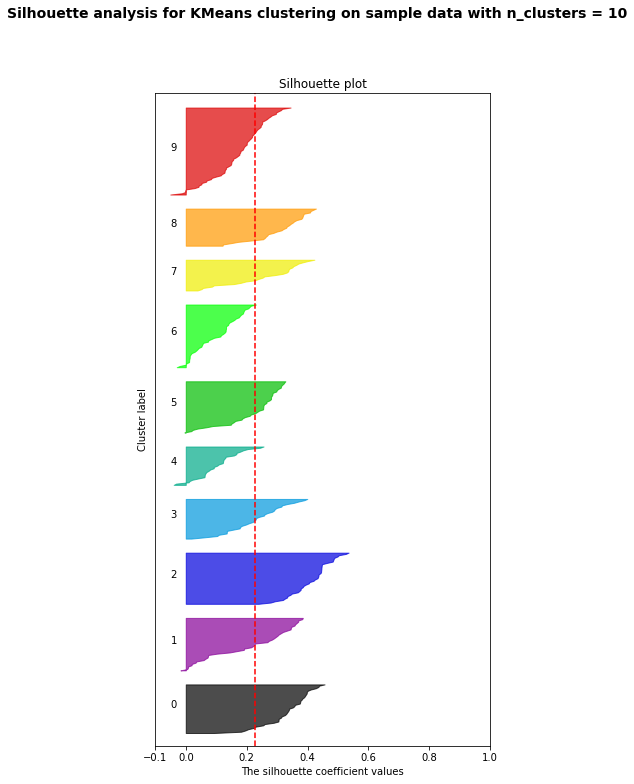

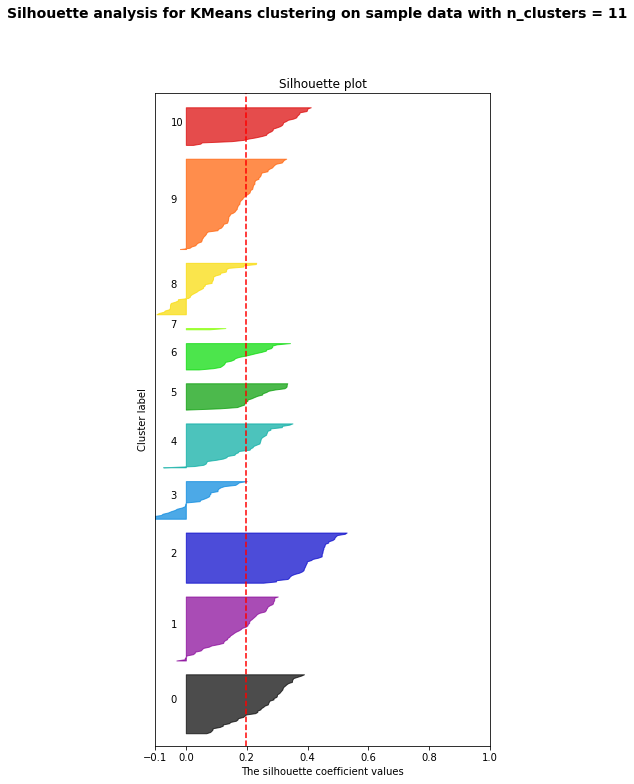

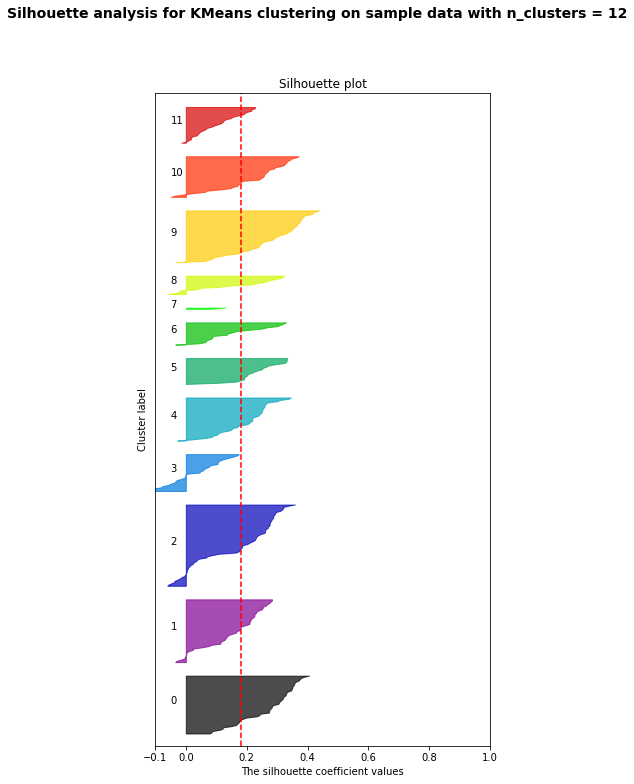

In [24]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

range_n_clusters = [8, 9, 10, 11, 12]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots(figsize=(6, 12))
    

    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    pca = PCA(n_components=n_clusters).fit(X)
    kmeans_3 = KMeans(init=pca.components_, n_clusters=n_clusters, n_init=1)
    estimator_3 = make_pipeline(MinMaxScaler(), kmeans_3).fit(X)
    cluster_labels = estimator_3.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("Silhouette plot")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()